# I. Using the Simpsons dataset build words embeddings using GENSIM and word2vec

**File reading**
***

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
import pandas as pd
# Dataset from - https://archive.ics.uci.edu/ml/datasets/SMS+Spam+Collection
ruta = 'gdrive/MyDrive/Allan/'
df = pd.read_csv(ruta + 'simpsons_dataset.csv').dropna()

df.head()

print(df.shape)
df.head(20) # returns (rows, columns)

(131853, 2)


,raw_character_text,spoken_words
0,Miss Hoover,"No, actually, it was a little of both. Sometim..."
1,Lisa Simpson,Where's Mr. Bergstrom?
2,Miss Hoover,I don't know. Although I'd sure like to talk t...
3,Lisa Simpson,That life is worth living.
4,Edna Krabappel-Flanders,The polls will be open from now until the end ...
5,Martin Prince,I don't think there's anything left to say.
6,Edna Krabappel-Flanders,Bart?
7,Bart Simpson,Victory party under the slide!
9,Lisa Simpson,Mr. Bergstrom! Mr. Bergstrom!
10,Landlady,"Hey, hey, he Moved out this morning. He must h..."


## Text Pre Processing for embeddings

In [4]:
import gzip
import gensim
import logging

### BOW

In [5]:
from gensim.utils import simple_preprocess

def preproccess(line):
    return simple_preprocess(line)



df['proccesed'] = df['spoken_words'].apply(preproccess)
df.head(10)

,raw_character_text,spoken_words,proccesed
0,Miss Hoover,"No, actually, it was a little of both. Sometim...","[no, actually, it, was, little, of, both, some..."
1,Lisa Simpson,Where's Mr. Bergstrom?,"[where, mr, bergstrom]"
2,Miss Hoover,I don't know. Although I'd sure like to talk t...,"[don, know, although, sure, like, to, talk, to..."
3,Lisa Simpson,That life is worth living.,"[that, life, is, worth, living]"
4,Edna Krabappel-Flanders,The polls will be open from now until the end ...,"[the, polls, will, be, open, from, now, until,..."
5,Martin Prince,I don't think there's anything left to say.,"[don, think, there, anything, left, to, say]"
6,Edna Krabappel-Flanders,Bart?,[bart]
7,Bart Simpson,Victory party under the slide!,"[victory, party, under, the, slide]"
9,Lisa Simpson,Mr. Bergstrom! Mr. Bergstrom!,"[mr, bergstrom, mr, bergstrom]"
10,Landlady,"Hey, hey, he Moved out this morning. He must h...","[hey, hey, he, moved, out, this, morning, he, ..."


In [ ]:
documents = df['proccesed'].to_numpy()

### Generate 150 sized Word2vec embbedings

In [ ]:
model_150 = gensim.models.Word2Vec(documents, size=150, window=10, min_count=2, workers=10, sg=1)

model_150.train(documents, total_examples=len(documents), epochs=10)

(9560237, 12451860)

In [ ]:
model_150.save(ruta + "Simpsons_150_5.model")

In [ ]:
print(model_150.wv['morning'])

[-0.63890326  0.10846733  0.2621539  -0.65934676 -0.40334252 -0.26605582
  0.17321849 -0.6024866   0.08498132  0.11652038  0.50398576 -0.21211119
  0.05390387  0.18061893  0.3015098   0.08347866  0.14469963 -0.83405244
  0.17533235 -0.04162638  0.6183     -0.33807558 -0.18840843  0.02227331
 -0.02494568 -0.08835534 -0.01377823 -0.07105224 -0.3861262   0.3388009
 -0.07940321 -0.65360343  0.19274007 -0.14105724 -0.37262785  0.0888844
  0.1294148  -0.57688934 -0.42189437 -0.00600035  0.6367246  -0.19068716
  0.04567035  0.68762124 -0.19758925  0.23837149 -0.16695373 -0.19293611
 -0.07125311  0.05320849  0.18708241 -0.10541743 -0.28201687  0.7094842
 -0.25645098 -0.35205057  0.23023403 -0.20347963 -0.1510435   0.03685154
 -0.5589231   0.28084967  0.25768906  0.00531028 -0.529553   -0.04728241
  0.16675429  0.37946555  0.08898065 -0.31580618  0.05178524  0.12641601
 -0.63134027 -0.23960596  0.04312992 -0.30715466  0.35951465  0.45118034
  0.37795386  0.03152329 -0.2635227   0.22686657  0.25

### Generate 100 sized Word2vec embbedings

In [ ]:
model_100 = gensim.models.Word2Vec (documents, size=100, window=10, min_count=2, workers=10, sg=1)
model_100.train(documents,total_examples=len(documents),epochs=10)

(9561668, 12451860)

In [ ]:
model_100.save(ruta + "Simpsons_100_5.model")

In [ ]:
print(model_100.wv['morning'])

[-0.07770337 -0.13991179  0.01039129 -0.05851186 -0.44024402  0.30961388
  0.2563497  -0.31092548  0.06384882 -0.02527217  0.5187642  -0.30900306
  0.12036112  0.23767419  0.6198319  -0.4083943   0.2794565  -0.36861867
  0.09575479 -0.01117299  0.1389652  -0.22764526  0.21883413 -0.38202563
 -0.22146434 -0.12078711 -0.07336242 -0.60447156 -0.10143026  0.35412258
 -0.04265483 -0.23064387  0.2479018   0.02684384  0.13238358  0.60883176
 -0.12055231 -0.25841895 -0.48418394 -0.18144009  0.6638696  -0.2861404
  0.29412997  0.43713382 -0.86015415  0.35922393 -0.10003532 -0.40140125
 -0.24480353  0.34139052  0.23656166 -0.21362723  0.45126554 -0.36781138
 -0.31128937 -0.2423737   0.20028795 -0.14395773 -0.40472496  0.15885065
 -0.65293723  0.15970862 -0.33238283  0.3797391  -0.0843339  -0.20046729
  0.05424267  0.18170676  0.1122841  -0.2426278   0.23929653  0.1707917
 -0.8369635  -0.14942035 -0.35414368  0.14158459  0.6019211   0.1906644
 -0.2459112   0.3002781   0.08913559  0.06373049  0.24

### Generate 50 sized Word2vec embbedings

In [ ]:
model_50 = gensim.models.Word2Vec(documents, size=50, window=10, min_count=2, workers=10, sg=1)
model_50.train(documents, total_examples=len(documents),epochs=10)

(9563250, 12451860)

In [ ]:
model_50.save(ruta + "Simpsons_50_5.model")


In [ ]:
df.shape

(131853, 3)

## Load from disk the generated models


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import gensim

In [7]:

model50 = gensim.models.Word2Vec.load(ruta + "Simpsons_50_5.model")
model100 = gensim.models.Word2Vec.load(ruta + "Simpsons_100_5.model")
model150 = gensim.models.Word2Vec.load(ruta + "Simpsons_150_5.model")

In [8]:
model50.wv.similar_by_word('homer')

[('marge', 0.8575096130371094),
 ('simpson', 0.8079066276550293),
 ('abe', 0.8073282241821289),
 ('fonzie', 0.7955304980278015),
 ('bart', 0.777596652507782),
 ('wildcats', 0.7676181197166443),
 ('you', 0.7602591514587402),
 ('newbie', 0.7582187652587891),
 ('murmurs', 0.755567193031311),
 ('nikki', 0.7506440877914429)]

In [9]:
def display_closestwords_tsnescatterplot(model, word, n):
    
    arr = np.empty((0,n), dtype='f')
    word_labels = [word]

    # get close words
    close_words = model.wv.similar_by_word(word)
    
    # add the vector for each of the closest words to the array
    arr = np.append(arr, np.array([model.wv[word]]), axis=0)
    for wrd_score in close_words:
        wrd_vector = model.wv[wrd_score[0]]
        word_labels.append(wrd_score[0])
        arr = np.append(arr, np.array([wrd_vector]), axis=0)
        
    # find tsne coords for 2 dimensions
    tsne = TSNE(n_components=2, random_state=0)
    np.set_printoptions(suppress=True)
    Y = tsne.fit_transform(arr)

    x_coords = Y[:, 0]
    y_coords = Y[:, 1]
    # display scatter plot
    plt.scatter(x_coords, y_coords)

    for label, x, y in zip(word_labels, x_coords, y_coords):
        plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
    plt.xlim(x_coords.min()+0.00005, x_coords.max()+0.00005)
    plt.ylim(y_coords.min()+0.00005, y_coords.max()+0.00005)
    plt.savefig(f'./{word}_{n}.jpg')
    plt.show()

# I. 2D Graphs and analysis
***

**Vector dimension:** 50

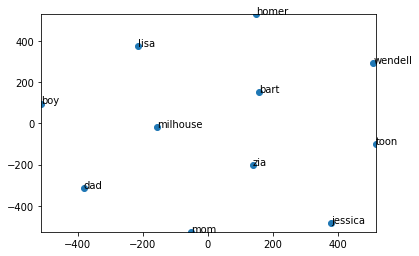

In [10]:
display_closestwords_tsnescatterplot(model50, 'bart', 50)

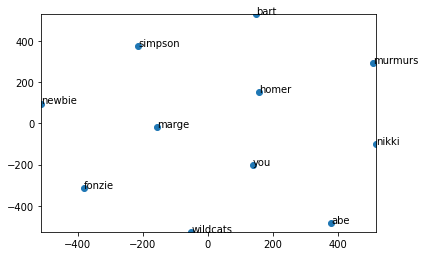

In [11]:
display_closestwords_tsnescatterplot(model50, 'homer', 50)

**Vector dimension:** 100

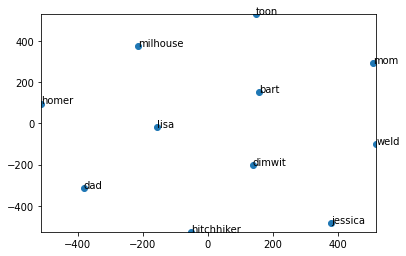

In [12]:
display_closestwords_tsnescatterplot(model100, 'bart', 100)

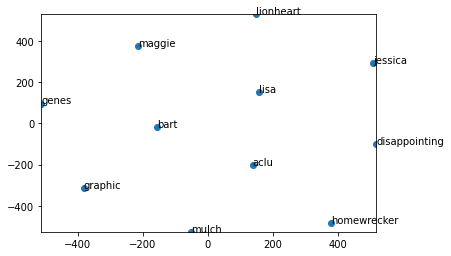

In [13]:
display_closestwords_tsnescatterplot(model100, 'homer', 100)

**Vector size:** 150

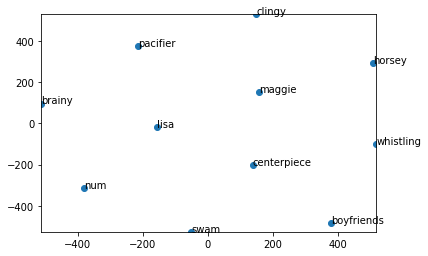

In [14]:
display_closestwords_tsnescatterplot(model150, 'bart', 150)

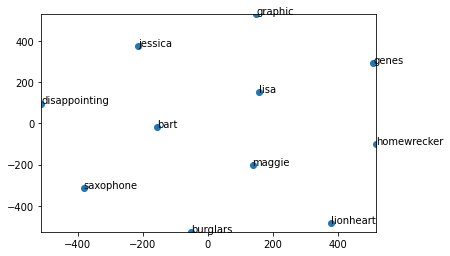

In [15]:
display_closestwords_tsnescatterplot(model150, 'homer ', 150)

In [4]:
import gensim
import pandas as pd
import tensorflow as tf
import numpy as np
from tensorflow.keras import layers
from tensorflow.keras import losses
from tensorflow.keras import preprocessing
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

## Data preparation

In [5]:
'''
Aquí se filtra el dataset para que solo queden los dialogos relevantes, los de ls personajes principales.
'''
# Dataset from - https://archive.ics.uci.edu/ml/datasets/SMS+Spam+Collection
df_0 = pd.read_csv(ruta + 'simpsons_dataset.csv').dropna()
## Array of first 6 main characters
target_simpsons = df_0.groupby(['raw_character_text']).count().sort_values(by=['spoken_words'], ascending=False).head(6).index.to_numpy()
target_simpsons

array(['Homer Simpson', 'Marge Simpson', 'Bart Simpson', 'Lisa Simpson',
       'C. Montgomery Burns', 'Moe Szyslak'], dtype=object)

In [6]:
df = df_0.loc[df_0['raw_character_text'].isin(target_simpsons)]
df.groupby(['raw_character_text']).count()

,spoken_words
raw_character_text,
Bart Simpson,12995
C. Montgomery Burns,3077
Homer Simpson,27850
Lisa Simpson,10756
Marge Simpson,13172
Moe Szyslak,2808


In [7]:
'''
Se realiza un Encoding de los nombres de los personajes principales. 
La idea es que cada categoría de personaje este codificada por un vector
1x6 binario. 
'''
enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(df[['raw_character_text']])
print(enc.categories_)

[array(['Bart Simpson', 'C. Montgomery Burns', 'Homer Simpson',
       'Lisa Simpson', 'Marge Simpson', 'Moe Szyslak'], dtype=object)]


In [8]:
'''
Se dividen los datos en 60 training, 20 validación y 20 testing
'''
# df_yelp = df[df['source'] == 'yelp']
sentences = df['spoken_words'].values

y = enc.transform(df[['raw_character_text']]).toarray()
sentences_train_val, sentences_test, y_train_val, y_test = train_test_split(sentences, y, test_size=0.20, random_state=1000)
sentences_train, sentences_val, y_train, y_val = train_test_split(sentences_train_val, y_train_val, test_size=0.25, random_state=1000)

# Once we have our handles, we format the datasets in a Keras-fit compatible
# format: a tuple of the form (text_data, label).
train_dataset = tf.data.Dataset.from_tensor_slices((sentences_train, y_train))
test_dataset = tf.data.Dataset.from_tensor_slices((sentences_test, y_test))

# We also create a dataset with only the textual data in it. This will be used
# to build our vocabulary later on.
text_dataset = tf.data.Dataset.from_tensor_slices((sentences_train))

In [9]:
vectorize_layer = TextVectorization(
    ngrams=None, max_tokens=None, vocabulary=None,
    output_mode='binary', output_sequence_length=None, pad_to_max_tokens=True, 
)

Now that the vocab layer has been created, call `adapt` on the text-only
 dataset to create the vocabulary

In [10]:
vectorize_layer.adapt(text_dataset.batch(32))
len(vectorize_layer.get_vocabulary())

22077

# 3. Multinomial Classification Using Pretrained Embbedings

In [11]:
from keras.models import Sequential

In [12]:
# Load pretrained models
model_50 = gensim.models.Word2Vec.load(ruta + "Simpsons_50_5.model")
model_100 = gensim.models.Word2Vec.load(ruta + "Simpsons_100_5.model")
model_150 = gensim.models.Word2Vec.load(ruta + "Simpsons_150_5.model")

In [13]:
# pretrained.wv.index_to_key

def get_weight_matrix(embedding, vocab):
    # total vocabulary size plus 0 for unknown words
    vocab_size = len(vocab) 
    embedding_dim = len(embedding['homer'])
    hits = 0
    misses = 0
    # define weight matrix dimensions with all 0
    weight_matrix = np.zeros((vocab_size, embedding_dim))
    # step vocab, store vectors using the Tokenizer's integer mapping
    for i in range(len(vocab)):
        try:
            weight_matrix[i] = embedding[vocab[i]]
            hits += 1
        except:
            misses += 1
    print("Converted %d words (%d misses)" % (hits, misses))
    return weight_matrix

In [14]:

x_train = vectorize_layer(np.array([[s] for s in sentences_train])).numpy()
x_val = vectorize_layer(np.array([[s] for s in sentences_val])).numpy()
x_test = vectorize_layer(np.array([[s] for s in sentences_test])).numpy()

y_train = np.array(y_train)
y_val = np.array(y_val)
y_test = np.array(y_test)

In [15]:
print(x_train.shape)
print(x_val.shape)
# print(x_test.shape)
print(y_train.shape)
print(y_val.shape)
# print(y_test.shape)

(42394, 22077)
(14132, 22077)
(42394, 6)
(14132, 6)


In [16]:
y_train

array([[0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0., 0.],
       ...,
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0.]])

In [17]:
def generatePreEmbbedingModel(model, embedding_dim, vectorize_layer, architecture_id = 1):
    batch_size = 32
    epochs = 10
    weights = get_weight_matrix(model.wv, vectorize_layer.get_vocabulary())
    num_tokens = len(vectorize_layer.get_vocabulary()) 
    embedding_layer = layers.Embedding(
        num_tokens,
        embedding_dim,
        embeddings_initializer=tf.keras.initializers.Constant(weights),
        trainable=False,
    )

    int_sequences_input = tf.keras.Input(shape=(None,), dtype='int64')
    embedded_sequences = embedding_layer(int_sequences_input)

    if architecture_id == 1:
        x = layers.GlobalAveragePooling1D()(embedded_sequences)
        x = layers.Dense(10, activation='relu')(x)
    elif architecture_id == 2:
        # x = layers.SimpleRNN(5)(embedded_sequences)
        # x = layers.Dropout(0.3)(x)
        # x = layers.Dense(10, activation='relu')(x)
        x = layers.GlobalAveragePooling1D()(embedded_sequences)
        x = layers.Dense(80, activation='relu')(x)
        x = layers.Dense(250, activation='relu')(x)
    elif architecture_id == 3:
        x = layers.GlobalAveragePooling1D()(embedded_sequences)
        x = layers.Dense(80, activation='relu')(x)
        x = layers.Dropout(0.3)(x)
        x = layers.BatchNormalization()(x)
        x = layers.Dense(250, activation='relu')(x)
        x = layers.Dropout(0.5)(x)

    preds = layers.Dense(len(target_simpsons), activation='softmax')(x)
    modelRN = tf.keras.Model(int_sequences_input, preds)

    return modelRN



In [18]:
#Parameters

batch_size = 32
epochs = 10

### First Architecture

In [19]:
red_50 = generatePreEmbbedingModel(model_50, 50, vectorize_layer)
red_100 = generatePreEmbbedingModel(model_100, 100, vectorize_layer)
red_150 = generatePreEmbbedingModel(model_150, 150, vectorize_layer)

Converted 15593 words (6484 misses)
Converted 15593 words (6484 misses)
Converted 15593 words (6484 misses)


In [20]:
red_50.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, None)]            0         
_________________________________________________________________
embedding (Embedding)        (None, None, 50)          1103850   
_________________________________________________________________
global_average_pooling1d (Gl (None, 50)                0         
_________________________________________________________________
dense (Dense)                (None, 10)                510       
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 66        
Total params: 1,104,426
Trainable params: 576
Non-trainable params: 1,103,850
_________________________________________________________________


In [21]:
red_100.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, None)]            0         
_________________________________________________________________
embedding_1 (Embedding)      (None, None, 100)         2207700   
_________________________________________________________________
global_average_pooling1d_1 ( (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
_________________________________________________________________
dense_3 (Dense)              (None, 6)                 66        
Total params: 2,208,776
Trainable params: 1,076
Non-trainable params: 2,207,700
_________________________________________________________________


In [22]:
red_150.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, None)]            0         
_________________________________________________________________
embedding_2 (Embedding)      (None, None, 150)         3311550   
_________________________________________________________________
global_average_pooling1d_2 ( (None, 150)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1510      
_________________________________________________________________
dense_5 (Dense)              (None, 6)                 66        
Total params: 3,313,126
Trainable params: 1,576
Non-trainable params: 3,311,550
_________________________________________________________________


In [23]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


def get_metrics_by_class(model, x,y):
  y_pred = model.predict(x, batch_size=64, verbose=1)
  y_pred_bool = np.argmax(y_pred, axis=1)
  y_label = np.argmax(y, axis=1)
  print(classification_report(y_label, y_pred_bool))

In [24]:
red_50.compile(loss='categorical_crossentropy',  optimizer='adam', metrics=['accuracy'])
red_100.compile(loss='categorical_crossentropy',  optimizer='adam', metrics=['accuracy'])
red_150.compile(loss='categorical_crossentropy',  optimizer='adam', metrics=['accuracy'])

In [25]:
red_50.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_val, y_val))

Epoch 1/10
1325/1325 [==============================] - 45s 32ms/step - loss: 1.6887 - accuracy: 0.3910 - val_loss: 1.5565 - val_accuracy: 0.3942
Epoch 2/10
1325/1325 [==============================] - 43s 32ms/step - loss: 1.5471 - accuracy: 0.3964 - val_loss: 1.5431 - val_accuracy: 0.3942
Epoch 3/10
1325/1325 [==============================] - 44s 33ms/step - loss: 1.5426 - accuracy: 0.3945 - val_loss: 1.5423 - val_accuracy: 0.3942
Epoch 4/10
1325/1325 [==============================] - 44s 33ms/step - loss: 1.5414 - accuracy: 0.3956 - val_loss: 1.5422 - val_accuracy: 0.3942
Epoch 5/10
1325/1325 [==============================] - 43s 33ms/step - loss: 1.5354 - accuracy: 0.4003 - val_loss: 1.5425 - val_accuracy: 0.3942
Epoch 6/10
1325/1325 [==============================] - 43s 33ms/step - loss: 1.5381 - accuracy: 0.3963 - val_loss: 1.5423 - val_accuracy: 0.3942
Epoch 7/10
1325/1325 [==============================] - 43s 33ms/step - loss: 1.5419 - accuracy: 0.3944 - val_loss: 1.5423 -

In [26]:
red_100.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_val, y_val))

Epoch 1/10
1325/1325 [==============================] - 77s 57ms/step - loss: 1.6897 - accuracy: 0.3990 - val_loss: 1.5574 - val_accuracy: 0.3942
Epoch 2/10
1325/1325 [==============================] - 76s 57ms/step - loss: 1.5522 - accuracy: 0.3941 - val_loss: 1.5431 - val_accuracy: 0.3942
Epoch 3/10
1325/1325 [==============================] - 76s 57ms/step - loss: 1.5413 - accuracy: 0.3953 - val_loss: 1.5425 - val_accuracy: 0.3942
Epoch 4/10
1325/1325 [==============================] - 76s 57ms/step - loss: 1.5421 - accuracy: 0.3943 - val_loss: 1.5422 - val_accuracy: 0.3942
Epoch 5/10
1325/1325 [==============================] - 76s 57ms/step - loss: 1.5408 - accuracy: 0.3965 - val_loss: 1.5423 - val_accuracy: 0.3942
Epoch 6/10
1325/1325 [==============================] - 76s 57ms/step - loss: 1.5431 - accuracy: 0.3960 - val_loss: 1.5423 - val_accuracy: 0.3942
Epoch 7/10
1325/1325 [==============================] - 76s 57ms/step - loss: 1.5354 - accuracy: 0.3999 - val_loss: 1.5423 -

In [27]:
red_150.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_val, y_val))

Epoch 1/10
1325/1325 [==============================] - 110s 83ms/step - loss: 1.6904 - accuracy: 0.3960 - val_loss: 1.5563 - val_accuracy: 0.3942
Epoch 2/10
1325/1325 [==============================] - 111s 84ms/step - loss: 1.5484 - accuracy: 0.3957 - val_loss: 1.5430 - val_accuracy: 0.3942
Epoch 3/10
1325/1325 [==============================] - 113s 85ms/step - loss: 1.5409 - accuracy: 0.3957 - val_loss: 1.5424 - val_accuracy: 0.3942
Epoch 4/10
1325/1325 [==============================] - 113s 85ms/step - loss: 1.5410 - accuracy: 0.3962 - val_loss: 1.5425 - val_accuracy: 0.3942
Epoch 5/10
1325/1325 [==============================] - 112s 85ms/step - loss: 1.5424 - accuracy: 0.3976 - val_loss: 1.5423 - val_accuracy: 0.3942
Epoch 6/10
1325/1325 [==============================] - 109s 83ms/step - loss: 1.5393 - accuracy: 0.3998 - val_loss: 1.5423 - val_accuracy: 0.3942
Epoch 7/10
1325/1325 [==============================] - 109s 83ms/step - loss: 1.5431 - accuracy: 0.3934 - val_loss: 1

#### Testing

In [28]:
get_metrics_by_class(red_50, x_test, y_test)

221/221 [==============================] - 10s 43ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      2631
           1       0.00      0.00      0.00       598
           2       0.39      1.00      0.56      5510
           3       0.00      0.00      0.00      2120
           4       0.00      0.00      0.00      2666
           5       0.00      0.00      0.00       607

    accuracy                           0.39     14132
   macro avg       0.06      0.17      0.09     14132
weighted avg       0.15      0.39      0.22     14132



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [29]:
get_metrics_by_class(red_100, x_test, y_test)

221/221 [==============================] - 18s 80ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      2631
           1       0.00      0.00      0.00       598
           2       0.39      1.00      0.56      5510
           3       0.00      0.00      0.00      2120
           4       0.00      0.00      0.00      2666
           5       0.00      0.00      0.00       607

    accuracy                           0.39     14132
   macro avg       0.06      0.17      0.09     14132
weighted avg       0.15      0.39      0.22     14132



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [30]:
get_metrics_by_class(red_150, x_test, y_test)

221/221 [==============================] - 26s 116ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      2631
           1       0.00      0.00      0.00       598
           2       0.39      1.00      0.56      5510
           3       0.00      0.00      0.00      2120
           4       0.00      0.00      0.00      2666
           5       0.00      0.00      0.00       607

    accuracy                           0.39     14132
   macro avg       0.06      0.17      0.09     14132
weighted avg       0.15      0.39      0.22     14132



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### Training

In [31]:
get_metrics_by_class(red_50, x_train, y_train)

663/663 [==============================] - 28s 42ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      7822
           1       0.00      0.00      0.00      1869
           2       0.40      1.00      0.57     16769
           3       0.00      0.00      0.00      6429
           4       0.00      0.00      0.00      7860
           5       0.00      0.00      0.00      1645

    accuracy                           0.40     42394
   macro avg       0.07      0.17      0.09     42394
weighted avg       0.16      0.40      0.22     42394



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [32]:
get_metrics_by_class(red_100, x_train, y_train)

663/663 [==============================] - 53s 80ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      7822
           1       0.00      0.00      0.00      1869
           2       0.40      1.00      0.57     16769
           3       0.00      0.00      0.00      6429
           4       0.00      0.00      0.00      7860
           5       0.00      0.00      0.00      1645

    accuracy                           0.40     42394
   macro avg       0.07      0.17      0.09     42394
weighted avg       0.16      0.40      0.22     42394



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [33]:
get_metrics_by_class(red_150, x_train, y_train)

663/663 [==============================] - 77s 116ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      7822
           1       0.00      0.00      0.00      1869
           2       0.40      1.00      0.57     16769
           3       0.00      0.00      0.00      6429
           4       0.00      0.00      0.00      7860
           5       0.00      0.00      0.00      1645

    accuracy                           0.40     42394
   macro avg       0.07      0.17      0.09     42394
weighted avg       0.16      0.40      0.22     42394



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### Validation

In [34]:
get_metrics_by_class(red_50, x_val, y_val)

221/221 [==============================] - 9s 42ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      2542
           1       0.00      0.00      0.00       610
           2       0.39      1.00      0.57      5571
           3       0.00      0.00      0.00      2207
           4       0.00      0.00      0.00      2646
           5       0.00      0.00      0.00       556

    accuracy                           0.39     14132
   macro avg       0.07      0.17      0.09     14132
weighted avg       0.16      0.39      0.22     14132



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [35]:
get_metrics_by_class(red_100, x_val, y_val)


221/221 [==============================] - 18s 80ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      2542
           1       0.00      0.00      0.00       610
           2       0.39      1.00      0.57      5571
           3       0.00      0.00      0.00      2207
           4       0.00      0.00      0.00      2646
           5       0.00      0.00      0.00       556

    accuracy                           0.39     14132
   macro avg       0.07      0.17      0.09     14132
weighted avg       0.16      0.39      0.22     14132



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [36]:
get_metrics_by_class(red_150, x_val, y_val)

221/221 [==============================] - 26s 116ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      2542
           1       0.00      0.00      0.00       610
           2       0.39      1.00      0.57      5571
           3       0.00      0.00      0.00      2207
           4       0.00      0.00      0.00      2646
           5       0.00      0.00      0.00       556

    accuracy                           0.39     14132
   macro avg       0.07      0.17      0.09     14132
weighted avg       0.16      0.39      0.22     14132



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Second Architecture

In [37]:
red_50_2 = generatePreEmbbedingModel(model_50, 50, vectorize_layer, 2)
red_100_2 = generatePreEmbbedingModel(model_100, 100, vectorize_layer, 2)
red_150_2 = generatePreEmbbedingModel(model_150, 150, vectorize_layer, 2)

Converted 15593 words (6484 misses)
Converted 15593 words (6484 misses)
Converted 15593 words (6484 misses)


In [38]:
red_50_2.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, None)]            0         
_________________________________________________________________
embedding_3 (Embedding)      (None, None, 50)          1103850   
_________________________________________________________________
global_average_pooling1d_3 ( (None, 50)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 80)                4080      
_________________________________________________________________
dense_7 (Dense)              (None, 250)               20250     
_________________________________________________________________
dense_8 (Dense)              (None, 6)                 1506      
Total params: 1,129,686
Trainable params: 25,836
Non-trainable params: 1,103,850
____________________________________________

In [39]:
red_100_2.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, None)]            0         
_________________________________________________________________
embedding_4 (Embedding)      (None, None, 100)         2207700   
_________________________________________________________________
global_average_pooling1d_4 ( (None, 100)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 80)                8080      
_________________________________________________________________
dense_10 (Dense)             (None, 250)               20250     
_________________________________________________________________
dense_11 (Dense)             (None, 6)                 1506      
Total params: 2,237,536
Trainable params: 29,836
Non-trainable params: 2,207,700
____________________________________________

In [40]:
red_150_2.summary()

Model: "model_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, None)]            0         
_________________________________________________________________
embedding_5 (Embedding)      (None, None, 150)         3311550   
_________________________________________________________________
global_average_pooling1d_5 ( (None, 150)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 80)                12080     
_________________________________________________________________
dense_13 (Dense)             (None, 250)               20250     
_________________________________________________________________
dense_14 (Dense)             (None, 6)                 1506      
Total params: 3,345,386
Trainable params: 33,836
Non-trainable params: 3,311,550
____________________________________________

In [41]:
red_50_2.compile(loss='categorical_crossentropy',  optimizer='adam', metrics=['accuracy'])
red_100_2.compile(loss='categorical_crossentropy',  optimizer='adam', metrics=['accuracy'])
red_150_2.compile(loss='categorical_crossentropy',  optimizer='adam', metrics=['accuracy'])

In [42]:
red_50_2.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_val, y_val))

Epoch 1/10
1325/1325 [==============================] - 43s 32ms/step - loss: 1.6898 - accuracy: 0.3916 - val_loss: 1.5559 - val_accuracy: 0.3942
Epoch 2/10
1325/1325 [==============================] - 43s 32ms/step - loss: 1.5499 - accuracy: 0.3968 - val_loss: 1.5429 - val_accuracy: 0.3942
Epoch 3/10
1325/1325 [==============================] - 43s 32ms/step - loss: 1.5424 - accuracy: 0.3925 - val_loss: 1.5424 - val_accuracy: 0.3942
Epoch 4/10
1325/1325 [==============================] - 43s 32ms/step - loss: 1.5381 - accuracy: 0.3983 - val_loss: 1.5424 - val_accuracy: 0.3942
Epoch 5/10
1325/1325 [==============================] - 43s 33ms/step - loss: 1.5454 - accuracy: 0.3917 - val_loss: 1.5424 - val_accuracy: 0.3942
Epoch 6/10
1325/1325 [==============================] - 43s 32ms/step - loss: 1.5407 - accuracy: 0.3942 - val_loss: 1.5425 - val_accuracy: 0.3942
Epoch 7/10
1325/1325 [==============================] - 43s 32ms/step - loss: 1.5344 - accuracy: 0.3983 - val_loss: 1.5423 -

In [43]:
red_100_2.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_val, y_val))

Epoch 1/10
1325/1325 [==============================] - 77s 58ms/step - loss: 1.6890 - accuracy: 0.3901 - val_loss: 1.5561 - val_accuracy: 0.3942
Epoch 2/10
1325/1325 [==============================] - 77s 58ms/step - loss: 1.5452 - accuracy: 0.3983 - val_loss: 1.5431 - val_accuracy: 0.3942
Epoch 3/10
1325/1325 [==============================] - 77s 58ms/step - loss: 1.5409 - accuracy: 0.3934 - val_loss: 1.5423 - val_accuracy: 0.3942
Epoch 4/10
1325/1325 [==============================] - 77s 58ms/step - loss: 1.5407 - accuracy: 0.3972 - val_loss: 1.5424 - val_accuracy: 0.3942
Epoch 5/10
1325/1325 [==============================] - 77s 58ms/step - loss: 1.5376 - accuracy: 0.3996 - val_loss: 1.5423 - val_accuracy: 0.3942
Epoch 6/10
1325/1325 [==============================] - 77s 58ms/step - loss: 1.5395 - accuracy: 0.3951 - val_loss: 1.5424 - val_accuracy: 0.3942
Epoch 7/10
1325/1325 [==============================] - 77s 58ms/step - loss: 1.5430 - accuracy: 0.3928 - val_loss: 1.5424 -

In [44]:
red_150_2.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_val, y_val))


Epoch 1/10
1325/1325 [==============================] - 111s 83ms/step - loss: 1.6886 - accuracy: 0.3953 - val_loss: 1.5568 - val_accuracy: 0.3942
Epoch 2/10
1325/1325 [==============================] - 110s 83ms/step - loss: 1.5499 - accuracy: 0.3955 - val_loss: 1.5430 - val_accuracy: 0.3942
Epoch 3/10
1325/1325 [==============================] - 111s 84ms/step - loss: 1.5496 - accuracy: 0.3891 - val_loss: 1.5425 - val_accuracy: 0.3942
Epoch 4/10
1325/1325 [==============================] - 111s 84ms/step - loss: 1.5394 - accuracy: 0.3932 - val_loss: 1.5424 - val_accuracy: 0.3942
Epoch 5/10
1325/1325 [==============================] - 112s 84ms/step - loss: 1.5448 - accuracy: 0.3951 - val_loss: 1.5423 - val_accuracy: 0.3942
Epoch 6/10
1325/1325 [==============================] - 112s 84ms/step - loss: 1.5413 - accuracy: 0.3944 - val_loss: 1.5423 - val_accuracy: 0.3942
Epoch 7/10
1325/1325 [==============================] - 113s 85ms/step - loss: 1.5383 - accuracy: 0.3934 - val_loss: 1

#### Testing

In [45]:
get_metrics_by_class(red_50_2, x_test, y_test)

221/221 [==============================] - 10s 44ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      2631
           1       0.00      0.00      0.00       598
           2       0.39      1.00      0.56      5510
           3       0.00      0.00      0.00      2120
           4       0.00      0.00      0.00      2666
           5       0.00      0.00      0.00       607

    accuracy                           0.39     14132
   macro avg       0.06      0.17      0.09     14132
weighted avg       0.15      0.39      0.22     14132



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [46]:
get_metrics_by_class(red_100_2, x_test, y_test)

221/221 [==============================] - 18s 82ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      2631
           1       0.00      0.00      0.00       598
           2       0.39      1.00      0.56      5510
           3       0.00      0.00      0.00      2120
           4       0.00      0.00      0.00      2666
           5       0.00      0.00      0.00       607

    accuracy                           0.39     14132
   macro avg       0.06      0.17      0.09     14132
weighted avg       0.15      0.39      0.22     14132



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [47]:
get_metrics_by_class(red_150_2, x_test, y_test)

221/221 [==============================] - 26s 120ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      2631
           1       0.00      0.00      0.00       598
           2       0.39      1.00      0.56      5510
           3       0.00      0.00      0.00      2120
           4       0.00      0.00      0.00      2666
           5       0.00      0.00      0.00       607

    accuracy                           0.39     14132
   macro avg       0.06      0.17      0.09     14132
weighted avg       0.15      0.39      0.22     14132



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### Training

In [48]:
get_metrics_by_class(red_50_2, x_train, y_train)

663/663 [==============================] - 29s 44ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      7822
           1       0.00      0.00      0.00      1869
           2       0.40      1.00      0.57     16769
           3       0.00      0.00      0.00      6429
           4       0.00      0.00      0.00      7860
           5       0.00      0.00      0.00      1645

    accuracy                           0.40     42394
   macro avg       0.07      0.17      0.09     42394
weighted avg       0.16      0.40      0.22     42394



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [49]:
get_metrics_by_class(red_100_2, x_train, y_train)

663/663 [==============================] - 55s 82ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      7822
           1       0.00      0.00      0.00      1869
           2       0.40      1.00      0.57     16769
           3       0.00      0.00      0.00      6429
           4       0.00      0.00      0.00      7860
           5       0.00      0.00      0.00      1645

    accuracy                           0.40     42394
   macro avg       0.07      0.17      0.09     42394
weighted avg       0.16      0.40      0.22     42394



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [50]:
get_metrics_by_class(red_150_2, x_train, y_train)

663/663 [==============================] - 79s 119ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      7822
           1       0.00      0.00      0.00      1869
           2       0.40      1.00      0.57     16769
           3       0.00      0.00      0.00      6429
           4       0.00      0.00      0.00      7860
           5       0.00      0.00      0.00      1645

    accuracy                           0.40     42394
   macro avg       0.07      0.17      0.09     42394
weighted avg       0.16      0.40      0.22     42394



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### Validation

In [51]:
get_metrics_by_class(red_50_2, x_val, y_val)

221/221 [==============================] - 10s 44ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      2542
           1       0.00      0.00      0.00       610
           2       0.39      1.00      0.57      5571
           3       0.00      0.00      0.00      2207
           4       0.00      0.00      0.00      2646
           5       0.00      0.00      0.00       556

    accuracy                           0.39     14132
   macro avg       0.07      0.17      0.09     14132
weighted avg       0.16      0.39      0.22     14132



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [52]:
get_metrics_by_class(red_100_2, x_val, y_val)


221/221 [==============================] - 18s 82ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      2542
           1       0.00      0.00      0.00       610
           2       0.39      1.00      0.57      5571
           3       0.00      0.00      0.00      2207
           4       0.00      0.00      0.00      2646
           5       0.00      0.00      0.00       556

    accuracy                           0.39     14132
   macro avg       0.07      0.17      0.09     14132
weighted avg       0.16      0.39      0.22     14132



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [53]:
get_metrics_by_class(red_150_2, x_val, y_val)

221/221 [==============================] - 26s 120ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      2542
           1       0.00      0.00      0.00       610
           2       0.39      1.00      0.57      5571
           3       0.00      0.00      0.00      2207
           4       0.00      0.00      0.00      2646
           5       0.00      0.00      0.00       556

    accuracy                           0.39     14132
   macro avg       0.07      0.17      0.09     14132
weighted avg       0.16      0.39      0.22     14132



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Third Architecture

In [54]:
red_50_3 = generatePreEmbbedingModel(model_50, 50, vectorize_layer, 3)
red_100_3 = generatePreEmbbedingModel(model_100, 100, vectorize_layer, 3)
red_150_3 = generatePreEmbbedingModel(model_150, 150, vectorize_layer, 3)

Converted 15593 words (6484 misses)
Converted 15593 words (6484 misses)
Converted 15593 words (6484 misses)


In [55]:
red_50_3.summary()

Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, None)]            0         
_________________________________________________________________
embedding_6 (Embedding)      (None, None, 50)          1103850   
_________________________________________________________________
global_average_pooling1d_6 ( (None, 50)                0         
_________________________________________________________________
dense_15 (Dense)             (None, 80)                4080      
_________________________________________________________________
dropout (Dropout)            (None, 80)                0         
_________________________________________________________________
batch_normalization (BatchNo (None, 80)                320       
_________________________________________________________________
dense_16 (Dense)             (None, 250)               2025

In [56]:
red_100_3.summary()

Model: "model_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         [(None, None)]            0         
_________________________________________________________________
embedding_7 (Embedding)      (None, None, 100)         2207700   
_________________________________________________________________
global_average_pooling1d_7 ( (None, 100)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 80)                8080      
_________________________________________________________________
dropout_2 (Dropout)          (None, 80)                0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 80)                320       
_________________________________________________________________
dense_19 (Dense)             (None, 250)               2025

In [57]:
red_150_3.summary()

Model: "model_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         [(None, None)]            0         
_________________________________________________________________
embedding_8 (Embedding)      (None, None, 150)         3311550   
_________________________________________________________________
global_average_pooling1d_8 ( (None, 150)               0         
_________________________________________________________________
dense_21 (Dense)             (None, 80)                12080     
_________________________________________________________________
dropout_4 (Dropout)          (None, 80)                0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 80)                320       
_________________________________________________________________
dense_22 (Dense)             (None, 250)               2025

In [58]:
red_50_3.compile(loss='categorical_crossentropy',  optimizer='adam', metrics=['accuracy'])
red_100_3.compile(loss='categorical_crossentropy',  optimizer='adam', metrics=['accuracy'])
red_150_3.compile(loss='categorical_crossentropy',  optimizer='adam', metrics=['accuracy'])

In [59]:
red_50_3.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_val, y_val))

Epoch 1/10
1325/1325 [==============================] - 46s 34ms/step - loss: 1.6901 - accuracy: 0.4019 - val_loss: 1.5575 - val_accuracy: 0.3942
Epoch 2/10
1325/1325 [==============================] - 45s 34ms/step - loss: 1.5529 - accuracy: 0.3916 - val_loss: 1.5430 - val_accuracy: 0.3942
Epoch 3/10
1325/1325 [==============================] - 45s 34ms/step - loss: 1.5460 - accuracy: 0.3935 - val_loss: 1.5423 - val_accuracy: 0.3942
Epoch 4/10
1325/1325 [==============================] - 45s 34ms/step - loss: 1.5427 - accuracy: 0.3935 - val_loss: 1.5423 - val_accuracy: 0.3942
Epoch 5/10
1325/1325 [==============================] - 45s 34ms/step - loss: 1.5337 - accuracy: 0.3983 - val_loss: 1.5424 - val_accuracy: 0.3942
Epoch 6/10
1325/1325 [==============================] - 45s 34ms/step - loss: 1.5372 - accuracy: 0.3971 - val_loss: 1.5423 - val_accuracy: 0.3942
Epoch 7/10
1325/1325 [==============================] - 45s 34ms/step - loss: 1.5431 - accuracy: 0.3944 - val_loss: 1.5424 -

In [60]:
red_100_3.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_val, y_val))

Epoch 1/10
1325/1325 [==============================] - 79s 59ms/step - loss: 1.6896 - accuracy: 0.3937 - val_loss: 1.5561 - val_accuracy: 0.3942
Epoch 2/10
1325/1325 [==============================] - 78s 59ms/step - loss: 1.5463 - accuracy: 0.3986 - val_loss: 1.5430 - val_accuracy: 0.3942
Epoch 3/10
1325/1325 [==============================] - 78s 59ms/step - loss: 1.5410 - accuracy: 0.3956 - val_loss: 1.5423 - val_accuracy: 0.3942
Epoch 4/10
1325/1325 [==============================] - 78s 59ms/step - loss: 1.5467 - accuracy: 0.3926 - val_loss: 1.5424 - val_accuracy: 0.3942
Epoch 5/10
1325/1325 [==============================] - 78s 59ms/step - loss: 1.5424 - accuracy: 0.3973 - val_loss: 1.5423 - val_accuracy: 0.3942
Epoch 6/10
1325/1325 [==============================] - 78s 59ms/step - loss: 1.5408 - accuracy: 0.3935 - val_loss: 1.5424 - val_accuracy: 0.3942
Epoch 7/10
1325/1325 [==============================] - 78s 59ms/step - loss: 1.5417 - accuracy: 0.3952 - val_loss: 1.5424 -

In [61]:
red_150_3.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(x_val, y_val))

Epoch 1/10
1325/1325 [==============================] - 114s 86ms/step - loss: 1.6899 - accuracy: 0.3943 - val_loss: 1.5564 - val_accuracy: 0.3942
Epoch 2/10
1325/1325 [==============================] - 113s 85ms/step - loss: 1.5501 - accuracy: 0.3930 - val_loss: 1.5433 - val_accuracy: 0.3942
Epoch 3/10
1325/1325 [==============================] - 111s 84ms/step - loss: 1.5444 - accuracy: 0.3939 - val_loss: 1.5424 - val_accuracy: 0.3942
Epoch 4/10
1325/1325 [==============================] - 111s 84ms/step - loss: 1.5413 - accuracy: 0.3966 - val_loss: 1.5424 - val_accuracy: 0.3942
Epoch 5/10
1325/1325 [==============================] - 111s 84ms/step - loss: 1.5418 - accuracy: 0.3958 - val_loss: 1.5423 - val_accuracy: 0.3942
Epoch 6/10
1325/1325 [==============================] - 113s 85ms/step - loss: 1.5430 - accuracy: 0.3969 - val_loss: 1.5422 - val_accuracy: 0.3942
Epoch 7/10
1325/1325 [==============================] - 113s 85ms/step - loss: 1.5428 - accuracy: 0.3942 - val_loss: 1

#### Testing

In [62]:
get_metrics_by_class(red_50_3, x_test, y_test)

221/221 [==============================] - 10s 44ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      2631
           1       0.00      0.00      0.00       598
           2       0.39      1.00      0.56      5510
           3       0.00      0.00      0.00      2120
           4       0.00      0.00      0.00      2666
           5       0.00      0.00      0.00       607

    accuracy                           0.39     14132
   macro avg       0.06      0.17      0.09     14132
weighted avg       0.15      0.39      0.22     14132



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [63]:
get_metrics_by_class(red_100_3, x_test, y_test)

221/221 [==============================] - 18s 83ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      2631
           1       0.00      0.00      0.00       598
           2       0.39      1.00      0.56      5510
           3       0.00      0.00      0.00      2120
           4       0.00      0.00      0.00      2666
           5       0.00      0.00      0.00       607

    accuracy                           0.39     14132
   macro avg       0.06      0.17      0.09     14132
weighted avg       0.15      0.39      0.22     14132



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [64]:
get_metrics_by_class(red_150_3, x_test, y_test)

221/221 [==============================] - 27s 120ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      2631
           1       0.00      0.00      0.00       598
           2       0.39      1.00      0.56      5510
           3       0.00      0.00      0.00      2120
           4       0.00      0.00      0.00      2666
           5       0.00      0.00      0.00       607

    accuracy                           0.39     14132
   macro avg       0.06      0.17      0.09     14132
weighted avg       0.15      0.39      0.22     14132



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### Training

In [65]:
get_metrics_by_class(red_50_3, x_train, y_train)

663/663 [==============================] - 29s 44ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      7822
           1       0.00      0.00      0.00      1869
           2       0.40      1.00      0.57     16769
           3       0.00      0.00      0.00      6429
           4       0.00      0.00      0.00      7860
           5       0.00      0.00      0.00      1645

    accuracy                           0.40     42394
   macro avg       0.07      0.17      0.09     42394
weighted avg       0.16      0.40      0.22     42394



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [66]:
get_metrics_by_class(red_100_3, x_train, y_train)

663/663 [==============================] - 55s 83ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      7822
           1       0.00      0.00      0.00      1869
           2       0.40      1.00      0.57     16769
           3       0.00      0.00      0.00      6429
           4       0.00      0.00      0.00      7860
           5       0.00      0.00      0.00      1645

    accuracy                           0.40     42394
   macro avg       0.07      0.17      0.09     42394
weighted avg       0.16      0.40      0.22     42394



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [67]:
get_metrics_by_class(red_150_3, x_train, y_train)

663/663 [==============================] - 79s 120ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      7822
           1       0.00      0.00      0.00      1869
           2       0.40      1.00      0.57     16769
           3       0.00      0.00      0.00      6429
           4       0.00      0.00      0.00      7860
           5       0.00      0.00      0.00      1645

    accuracy                           0.40     42394
   macro avg       0.07      0.17      0.09     42394
weighted avg       0.16      0.40      0.22     42394



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### Validation

In [68]:
get_metrics_by_class(red_50_3, x_val, y_val)

221/221 [==============================] - 10s 44ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      2542
           1       0.00      0.00      0.00       610
           2       0.39      1.00      0.57      5571
           3       0.00      0.00      0.00      2207
           4       0.00      0.00      0.00      2646
           5       0.00      0.00      0.00       556

    accuracy                           0.39     14132
   macro avg       0.07      0.17      0.09     14132
weighted avg       0.16      0.39      0.22     14132



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [69]:
get_metrics_by_class(red_100_3, x_val, y_val)


221/221 [==============================] - 18s 83ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      2542
           1       0.00      0.00      0.00       610
           2       0.39      1.00      0.57      5571
           3       0.00      0.00      0.00      2207
           4       0.00      0.00      0.00      2646
           5       0.00      0.00      0.00       556

    accuracy                           0.39     14132
   macro avg       0.07      0.17      0.09     14132
weighted avg       0.16      0.39      0.22     14132



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [70]:
get_metrics_by_class(red_150_3, x_val, y_val)

221/221 [==============================] - 27s 120ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      2542
           1       0.00      0.00      0.00       610
           2       0.39      1.00      0.57      5571
           3       0.00      0.00      0.00      2207
           4       0.00      0.00      0.00      2646
           5       0.00      0.00      0.00       556

    accuracy                           0.39     14132
   macro avg       0.07      0.17      0.09     14132
weighted avg       0.16      0.39      0.22     14132



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
